# The Wiener Process


A realization of a 1-d Wiener process $W(t)$ is the solution to the equation

$$ 
W(t)=\int_0^t dW(s)\approx \sum_{i=1}^N \Delta W(t_i)
$$ 

with  $t_i=i\times\Delta t$ and random increments $\Delta W(t_i)$ that are drawn from a Gaussian distribution with zero mean $\left<\Delta W(t_i)\right>=0$ and variance $\left<\Delta W^2(t_i)\right>=\Delta t$. The increments are statistically independent.

$$\left<\Delta W(t_i)\Delta W(t_j)\right>=\delta_{ij}dt$$

The process is quite useful for modelling diffusion phenomena, random walks and solving stochastic differential equations of the form

$$d X=f(X)dt+g(X)dW$$

which is the difference equation

$$X(t+\Delta t)=X(t)+f(X(t))\Delta t+g(X(t))\Delta W(t)$$

in the limit $\Delta t \rightarrow 0$, so a dynamical system that has a deterministic component that advances the state $X(t)$ by $f(X(t))\Delta t$ and a noise component that changes the state by a random increment $g(X(t))\Delta W(t)$ that is normally distributed.


## First we import the package `stopro`

In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

###  Single realization of a one-dimensional Wiener process $W(t)$


Let's start simple. The function ```wiener``` takes two arguments, the time $T$ and the time increment $dt$ like so 

```
wiener(T,dt)
```

The initial condition is by definition $W(0)=0$.

In [2]:
T = 1
dt = 0.001
X = p.wiener(T,dt)
X

{'X': array([[[ 0.        , -0.00400646,  0.00745613, ..., -1.38527059,
          -1.36304624, -1.36520072]]], shape=(1, 1, 1001)),
 't': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ], shape=(1001,)),
 'dt': 0.001,
 'steps': 1000,
 'savedsteps': 1000,
 'N': 1,
 'gap': 1,
 'covariance': array([[1.]])}

The function returns a dictionary with a number of elements

1. `X`: a numpy array of realizations X[]
2. `t`: the array of time points
3. `dt`: the time increment
4. `steps`: the number of steps (T/dt)
5. `savedsteps`: the number of saved trajectory points
6. `gap`: the number of integration steps between saved points
7. ```covariance```: the covariance matrix (matters later for multivariate processes)

Let's do it again an plot it.

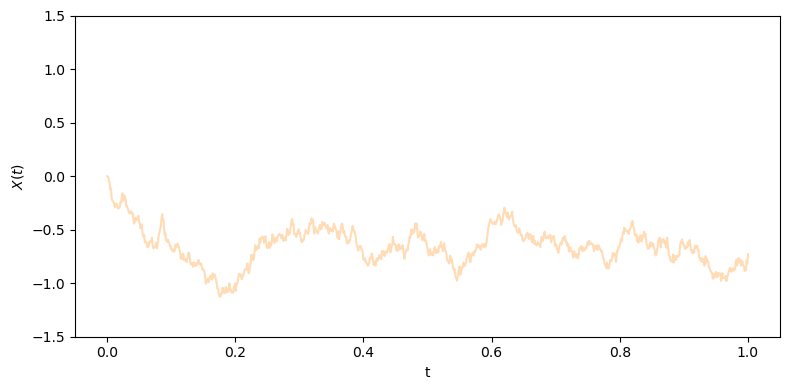

In [3]:
T = 1
dt = 0.001
res = p.wiener(T,dt)

fig,ax = plt.subplots(figsize=[8,4]);
ax.plot(res["t"],np.squeeze(res["X"][0]))
plt.xlabel("t")
plt.ylabel(r'$X(t)$')
plt.ylim([-1.5,1.5])
fig.tight_layout()
plt.show()

#### more samples...

... can be created with the keyword ```samples```. In the example below 5 realizations of the process are generated. In the returned result `res` the realization are stored in `res["X"]`, so that realization $i$ is `res["X"][i]`.

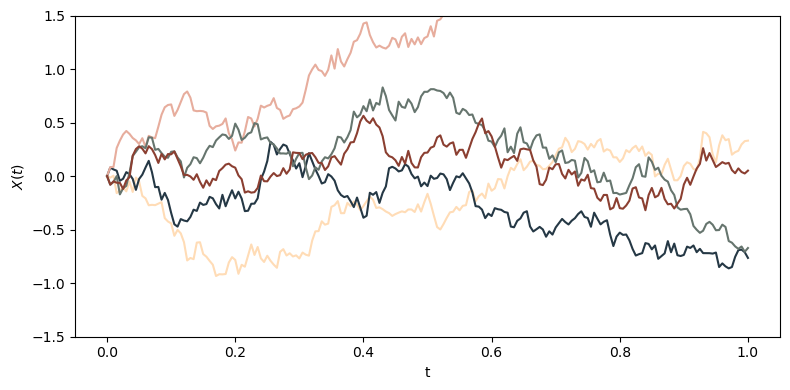

In [4]:
T = 1
dt = 0.0005
gap = 10
samples = 5
res = p.wiener(T,dt,samples=samples,gap=gap)

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel(r"$X(t)$")
plt.ylim([-1.5,1.5])
fig.tight_layout()
plt.show()

## Multi-variate Wiener processes

You can generate multi-dimensional Wiener processes, so like

$$\mathbf{W}(t)=[W_1(t),W_2(t),...,W_N(t)]$$

where $N$ is the number of dimensions. For multi-variate Wiener Processes one has to specify the covariance structure of the increments

$$\left<\Delta W_n(t_i)\Delta W_m(t_j)\right>=S_{nm}\delta_{ij}$$

The matrix $\mathbf S $ contains the covariance of the increments. By default it is equal to the identity matrix, so the dimensions are uncorrelated.

So for instance you can make a two-dimensional random walk like so:

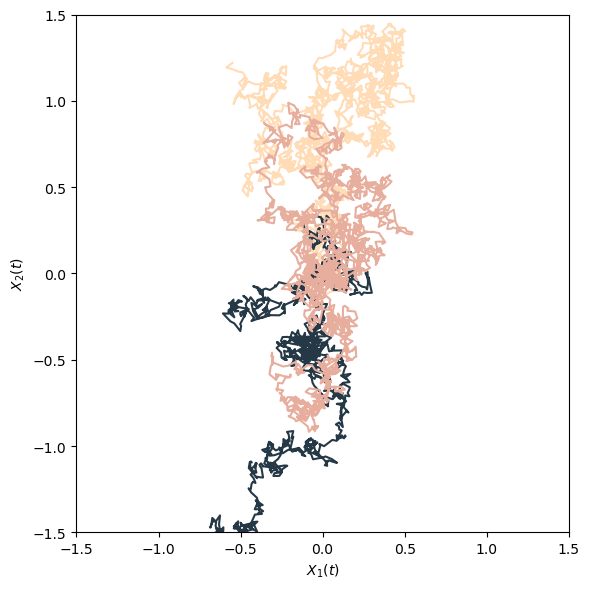

In [5]:
T = 1
dt = 0.00005
gap = 10
res=p.wiener(T,dt,N=2,samples=3,gap=gap)

fig,ax = plt.subplots(figsize=[6,6])
for i in range(len(res["X"])):
    ax.plot(res["X"][i][0],res["X"][i][1])
    
plt.xlabel(r'$X_1(t)$')
plt.ylabel(r'$X_2(t)$')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
#ax.set_aspect('equal', 'box')
fig.tight_layout()
plt.show()

## Specifying the covariance matrix $\mathbf S$.

### Difference in Variance

Multivariate becomes interesting when the Wiener increments $dW_i$ have a non-trivial correlation, typically quantified by the covariance matrix $\mathbf S$. The matrix $\mathbf S$ is positive definite.


Here's an example

$$ 
S =\left(\begin{array}{ccc}
2 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1/4
\end{array}\right) 
$$.

In this case the covariance is diagonal, which means the individual dimensions are independent. But each dimension has a different variance.

Here are 4 realizations of this 3-dimensional processes:

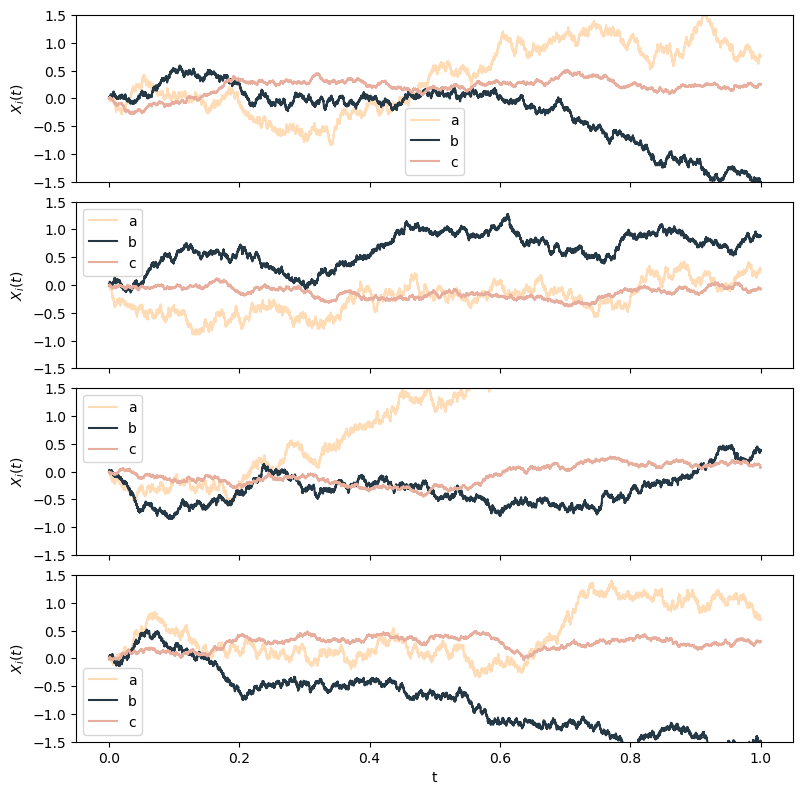

In [6]:
T = 1
dt = 0.00005

cov = np.array([[2,0,0],[0,1,0],[0,0,1/4]])
samples = 4

res=p.wiener(T,dt,N=3,covariance=cov,samples=samples)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[8,8],sharex=True)
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        if j == samples-1:
            ax[j].set_xlabel("t")
        ax[j].set_ylabel(r'$X_i(t)$')
        ax[j].set_ylim([-1.5,1.5])
        ax[j].legend(["a","b","c"])
plt.tight_layout()
plt.show()

### Non-trivial covariance

Here's an example

$$ 
S =\left(\begin{array}{ccc}
1 & 0 & 1/\sqrt{2}\\
0 & 1 & 1/\sqrt{2}\\
1/\sqrt{2} & 1/\sqrt{2} & 1
\end{array}\right) 
$$.

Here dimensions $1$ and $2$ are uncorrelated, and $3$ covaries with both, $1$ and $2$.

Here are 4 realizations of 3-dimensional processes, that exhibit this covariance:

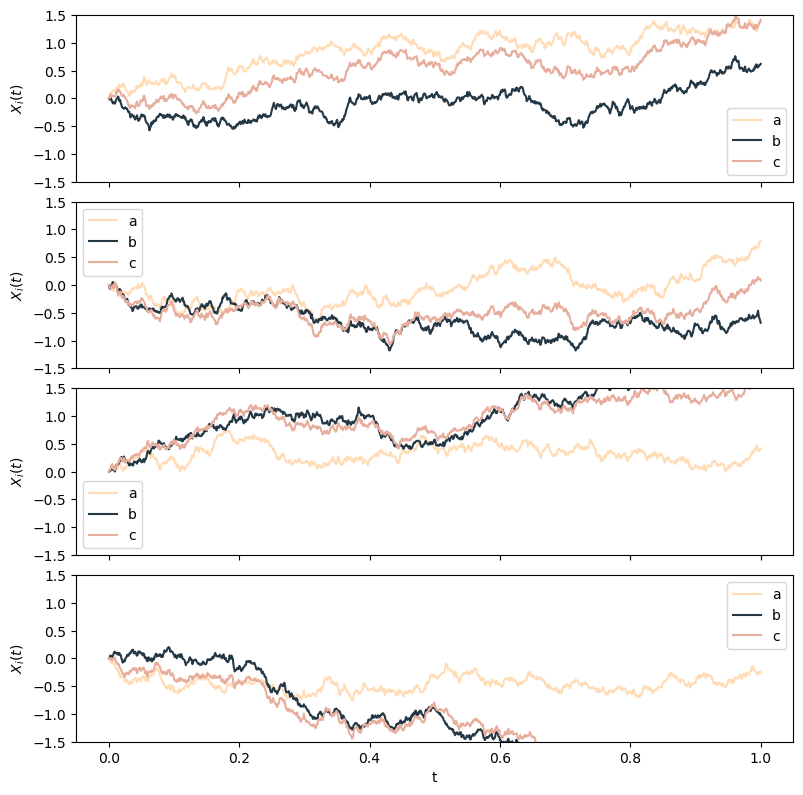

In [7]:
T = 1
dt = 0.001
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])
samples = 4

res=p.wiener(T,dt,N=3,covariance=cov,samples=samples)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[8,8],sharex=True)
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        if j == samples - 1:
            ax[j].set_xlabel("t")
        ax[j].set_ylabel(r'$X_i(t)$')
        ax[j].set_ylim([-1.5,1.5])
        ax[j].legend(["a","b","c"])
plt.tight_layout()
plt.show()

## Specifying the Mixing Matrix

Another way of generating covariance processes, is by linear superposition. Let's say you have $M$ uncorrelated processes $W_i(t)$ where $i=1,...,M$ and you construct new processes by

$$
dX_n = \sum _i A_n^i dW_i
$$.

where $n=1,...,N$ so that the **mixing matrix** $\mathbf{A}$ is an $N\times M$ matrix. The process $X_n(t)$ is a multivariate Wiener process with covariance matrix 

$$
\mathbf{S}=\mathbf{A}\mathbf{A}^T
$$.

So for example let's start with two independent processes $W_1(t)$ and $W_2(t)$ to generate a 4-dimensional covariant Wiener process with components

$$ 
dX_n(t)=\cos(\alpha_n)dW_1(t)+\sin(\alpha_n)dW_2(t) 
$$

with 

1. $\alpha_1=0$
2. $\alpha_2=\pi/2$
3. $\alpha_3=\pi/6$
4. $\alpha_3=\pi$

That means, $1$ and $2$ are uncorrelated, $3$ ist strongly correlated with $1$ and $4$ is uncorrelated with $2$ and anti-correlated with $1$.

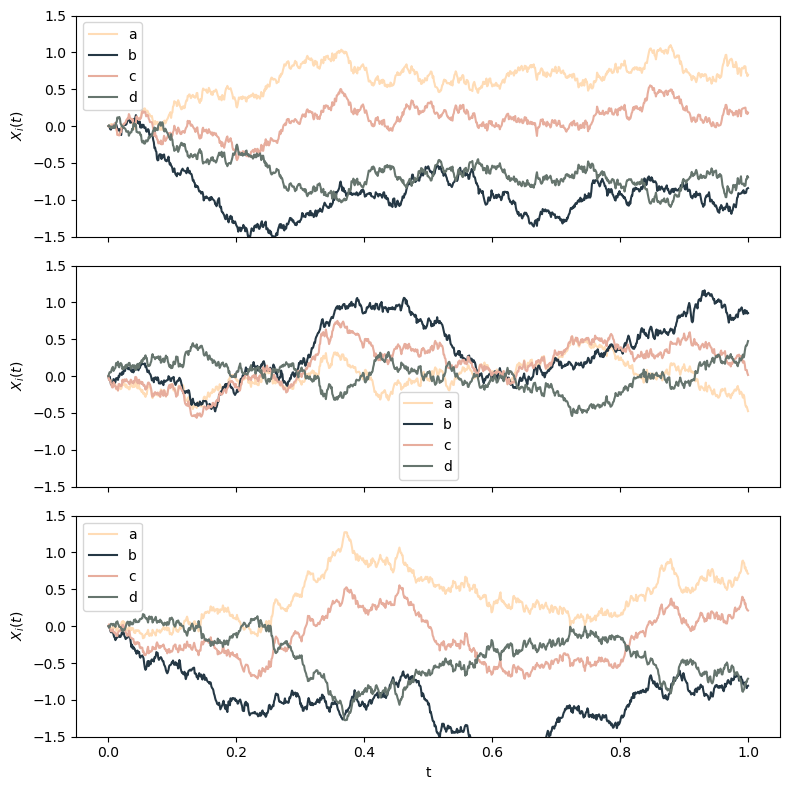

In [8]:
T = 1
dt = 0.001
samples = 3

A=np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/6,np.pi]]);

res=p.wiener(T,dt,N=4,mixing_matrix=A,samples=samples)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[8,8],sharex=True)
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        if j == samples - 1: 
            ax[j].set_xlabel("t")
        ax[j].set_ylabel(r'$X_i(t)$')
        ax[j].set_ylim([-1.5,1.5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()